<a href="https://colab.research.google.com/github/brunoclvrt/Case-2---BNB-price-prediction/blob/main/BNB_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

Launched in July 2017, Binance is the biggest cryptocurrency exchange globally based on daily trading volume. Binance aims to bring cryptocurrency exchanges to the forefront of financial activity globally. The idea behind Binance’s name is to show this new paradigm in global finance — Binary Finance, or Binance.

Binance is a unique ecosystem of decentralized, blockchain-based networks. The company has grown to be the leading crypto exchange in a number of countries, and their side organizations are attracting significant interest as well. With an initial maximum supply of 200,000,000 BNB coins, of which 168,137,036 are currently in circulation as of September 2021.

The prupose of this study is predict the BNB price until the end of year (december 31th), and answer a simple question: with the actual events running (FED increasing interest rate, Ukraine-Russia war, an lost of investors who are moving to fixed income to protect your money to volatile markets), the BNB price tends to go up or down?

#**Data Gathering**
###To start our exploration, we have to load some libraries

In [ ]:
!pip install yfinance
!pip install AutoTS
!pip install plotly

In [42]:
import pandas as pd # data manipulation
import numpy as np # numeric calculations

import yfinance as yf # in this library, we can get our stocks
from datetime import date, timedelta #library for time series manipulation
today = date.today()

###To continue our capture strategy, we need to pass some informations

In [43]:
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=1590) #we are capturing data since 01/01/2018
start_date = start_date.strftime("%Y-%m-%d")

In [44]:
# LOADNG OUR DATASET

df =yf.download("BNB-USD", start=start_date, end=end_date,progress=False) #collect our BNB stocks dataset
df["Date"] = df.index
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True,inplace=True)

df.head() #showing the first rows

,Open,High,Low,Close,Adj Close,Volume,Date
0,14.868900,23.508200,14.821200,22.759800,22.759800,637020992,2018-01-06
1,22.769100,22.769100,18.242500,18.656799,18.656799,258050000,2018-01-07
2,18.646500,19.216700,15.347100,18.260900,18.260900,296617984,2018-01-08
3,18.174000,20.320299,16.801399,17.411800,17.411800,194750000,2018-01-09
4,17.707899,17.707899,15.170800,17.390800,17.390800,146582000,2018-01-10


#**Data Exploration**
###Now, we're make some analysis in our dataset

In [45]:
#First of all, let's see the total of rows and columns

df.shape

(1590, 7)

In [46]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1.590000e+03
mean,132.935630,137.751494,127.646570,133.070999,133.070999,9.752112e+08
std,189.742309,196.253846,182.370297,189.670078,189.670078,1.533747e+09
min,4.532951,4.635010,4.189971,4.528650,4.528650,9.284000e+03
25%,13.988475,14.414125,13.562281,13.958557,13.958557,1.296870e+08
50%,22.002219,22.642650,21.163132,22.041303,22.041303,2.992769e+08
75%,293.556961,307.323792,274.888985,293.596664,293.596664,1.472566e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [47]:
import plotly.graph_objects as go
import plotly.offline as py

data = go.Candlestick(x = df["Date"], open = df["Open"],high = df["High"], low = df["Low"], close = df["Close"])
figure = go.Figure(data=data)

figure.update_layout(title = "BNB PRICE - HISTORICAL ANALYSIS", xaxis_rangeslider_visible = False)

py.iplot(figure)

As we can see, the prices start to go higher after 2021's january, reaching your peak in the middle of the first semester of 2021

In [48]:
#Now let's see te variation between the top and botton prices

x1 = df["Close"].max()
x2 = df["Close"].min()

x = ((x1/x2)-1)*100

print(x,"%")

14820.21045633444 %


We can see a variation of almost 15000%!

#**Now, it's time to make our predictions**
###Let's see if it works hahahahaha

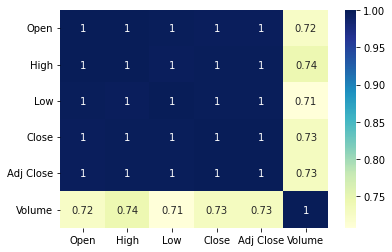

In [50]:
#Before to make our predicitons, we have to get the correlation between the values

correlation = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

figure = sns.heatmap(correlation, cmap = "YlGnBu",annot = True)

plt.show(figure)

The volume column has a low correlation with the other columns in comparison. But, the correlations are almost perfect betwenn prices columns (open, high, low and close). To continue our study, we'll focus our predictions in these columns.

To continue our study, let's define our prediction time, i decided to predict until the next 90 days (considering i made this study in 2021's may).

In [ ]:
#Importing our machine learning library

from autots import AutoTS

model = AutoTS(forecast_length = 232, frequency = 'infer', ensemble = 'simple')
model = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

prediction = model.predict()
forecast = prediction.forecast


Now, it's time to plot our results

In [51]:
forecast['Date'] = forecast.index #passing the index date to a Date column

import plotly.express as px

fig = px.line(forecast, x = "Date", y = "Close", title = 'BNB close price forecast until the end of year') #plotting our forecast

py.iplot(fig)

In [52]:
# now, let's see BNB percentile of variation

x1 = forecast['Close'].min()
x2 = forecast['Close'].max()

x = ((x2/x1)-1)*100

print(x,"%")

67.43852734548157 %


Wich means from now until the peak (around final of september/october of december), the BNB tends to variate closer to 67%.(too good, isn't it)?


#**Conclusions**

The BNB coin is the most valuable coins in cryptomarket today. Unfortunately, some events that happens today made all of cryptocurrencies drops, and with the characteristic volatility of the market, your price goes down. 

As we see with the forecast, despite some actual events, the BNB price tends to increase during the days, what makes new and old investors became bullish (some crypto slang when you bet in some cryptocurrent increase).